- 依說明文件，'DAYS_ENDDATE_FACT'(貸款已結束幾天)應只有在Closed的狀況下有值，建議將Active狀態下的此欄都改為na(數目不多)
- 檢查貸款結束天數DAYS_CREDIT_ENDDATE與DAYS_CREDIT的關係，大小的關係很怪；將DAYS_CREDIT_ENDDATE大於DAYS_CREDIT的DAYS_CREDIT_ENDDATE值都改為na
- DAYS_CREDIT_ENDDATE超過1800天，小於-2000天的，都改為na
- DAYS_CREDIT_UPDATE的-41947改為na

- CREDIT_DAY_OVERDUE的max,mean
- CREDIT_CURRENCY各幣別比例
- CREDIT_ACTIVE各狀態比例,非close的AMT_CREDIT_SUM_DEBT的max,mean
- AMT_CREDIT_MAX_OVERDUE的max,mean
- CNT_CREDIT_PROLONG的max,mean
- AMT_CREDIT_SUM的max,min
- AMT_CREDIT_SUM_DEBT的max,mean
- AMT_CREDIT_SUM_LIMIT的mean
- AMT_CREDIT_SUM_OVERDUE的max,mean
- CREDIT_TYPE的各比例
- DAYS_CREDIT_UPDATE的max,median
- AMT_ANNUITY的max,min
- AMT_ANNUITY/AMT_CREDIT_SUM的max,min
- DAYS_CREDIT_ENDDATE負值數目佔總數(不含na)的比例
- DAYS_CREDIT_ENDDATE的median
- AMT_CREDIT_SUM_DEBT/AMT_CREDIT_SUM的max,mean
- AMT_CREDIT_SUM_OVERDUE/AMT_CREDIT_SUM的max,mean
- AMT_CREDIT_MAX_OVERDUE/AMT_CREDIT_SUM的max,mean
- bureau_balance表合併過來的各欄位max,mean


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
bureau = pd.read_csv("..\\..\\datasets\\homecdt_eda\\bureau.csv")

In [3]:
bureau.shape

(1716428, 17)

In [5]:
bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


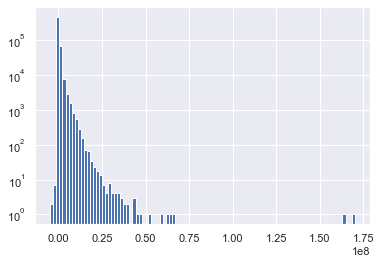

In [9]:
bureau[bureau['CREDIT_ACTIVE']!='Closed']['AMT_CREDIT_SUM_DEBT'].hist(bins=100,log=True)

In [11]:
bureau['CREDIT_TYPE'].unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

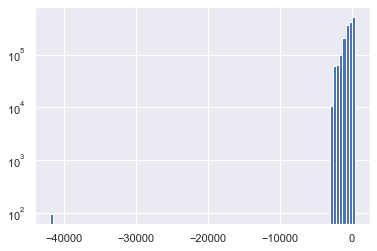

In [13]:
bureau['DAYS_CREDIT_UPDATE'].hist(bins=100,log=True)

In [15]:
bureau['DAYS_CREDIT_UPDATE'].min()

-41947

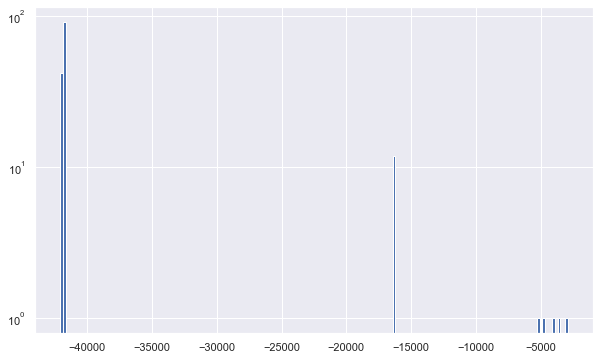

In [36]:
plt.figure(figsize=(10,6))
bureau[bureau['DAYS_CREDIT_ENDDATE']<-2900]['DAYS_CREDIT_ENDDATE'].hist(bins=200,log=True)

In [37]:
bbFE = pd.read_csv("..\\..\\datasets\\homecdt_fteng\\bureau_balance_FE.csv")
bbFE.head()

,SK_ID_BUREAU,total_status_0%,total_status_1%,total_status_2%,total_status_3%,total_status_4%,total_status_5%,total_status_C%,total_status_X%,recent_3_status_0%,...,recent_6_status_C%,recent_6_status_X%,recent_9_status_0%,recent_9_status_1%,recent_9_status_2%,recent_9_status_3%,recent_9_status_4%,recent_9_status_5%,recent_9_status_C%,recent_9_status_X%
0,5001709,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,0.000000,...,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,5001710,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,0.000000,...,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00
2,5001711,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.666667,...,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.25
3,5001712,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,0.000000,...,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00
4,5001713,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,...,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00


In [39]:
bbFE.columns

Index(['SK_ID_BUREAU', 'total_status_0%', 'total_status_1%', 'total_status_2%',
       'total_status_3%', 'total_status_4%', 'total_status_5%',
       'total_status_C%', 'total_status_X%', 'recent_3_status_0%',
       'recent_3_status_1%', 'recent_3_status_2%', 'recent_3_status_3%',
       'recent_3_status_4%', 'recent_3_status_5%', 'recent_3_status_C%',
       'recent_3_status_X%', 'recent_6_status_0%', 'recent_6_status_1%',
       'recent_6_status_2%', 'recent_6_status_3%', 'recent_6_status_4%',
       'recent_6_status_5%', 'recent_6_status_C%', 'recent_6_status_X%',
       'recent_9_status_0%', 'recent_9_status_1%', 'recent_9_status_2%',
       'recent_9_status_3%', 'recent_9_status_4%', 'recent_9_status_5%',
       'recent_9_status_C%', 'recent_9_status_X%'],
      dtype='object')

In [41]:
bureau['DEBT/CREDIT'] = bureau['AMT_CREDIT_SUM_DEBT']/bureau['AMT_CREDIT_SUM']
bureau['SUM_OVERDUE/CREDIT'] = bureau['AMT_CREDIT_SUM_OVERDUE']/bureau['AMT_CREDIT_SUM']
bureau['MAX_OVERDUE/CREDIT'] = bureau['AMT_CREDIT_MAX_OVERDUE']/bureau['AMT_CREDIT_SUM']

- CREDIT_DAY_OVERDUE的max,mean
- CREDIT_CURRENCY各幣別比例
- CREDIT_ACTIVE各狀態比例,非close的AMT_CREDIT_SUM_DEBT的max,mean
- AMT_CREDIT_MAX_OVERDUE的max,mean
- CNT_CREDIT_PROLONG的max,mean
- AMT_CREDIT_SUM的max,min
- AMT_CREDIT_SUM_DEBT的max,mean
- AMT_CREDIT_SUM_LIMIT的mean
- AMT_CREDIT_SUM_OVERDUE的max,mean
- CREDIT_TYPE的各比例
- DAYS_CREDIT_UPDATE的max,median
- AMT_ANNUITY的max,min
- AMT_ANNUITY/AMT_CREDIT_SUM的max,min
- DAYS_CREDIT_ENDDATE負值數目佔總數(不含na)的比例
- DAYS_CREDIT_ENDDATE的median
- AMT_CREDIT_SUM_DEBT/AMT_CREDIT_SUM的max,mean
- AMT_CREDIT_SUM_OVERDUE/AMT_CREDIT_SUM的max,mean
- AMT_CREDIT_MAX_OVERDUE/AMT_CREDIT_SUM的max,mean
- bureau_balance表合併過來的各欄位max,mean

In [46]:
# 針對bureau 欄位做計算

bureau2=bureau.copy()

# 把需要做mean,max的欄位篩選出
new_feature = ['CREDIT_DAY_OVERDUE',
               'AMT_CREDIT_MAX_OVERDUE',
               'CNT_CREDIT_PROLONG',
               'AMT_CREDIT_SUM_DEBT',
               'AMT_CREDIT_SUM_OVERDUE',
               'DEBT/CREDIT',
               'SUM_OVERDUE/CREDIT',
               'MAX_OVERDUE/CREDIT']

for column in bbFE.columns:
    new_feature.append(column)

new_feature.remove('SK_ID_BUREAU')    
new_feature

['CREDIT_DAY_OVERDUE',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DEBT/CREDIT',
 'SUM_OVERDUE/CREDIT',
 'MAX_OVERDUE/CREDIT',
 'total_status_0%',
 'total_status_1%',
 'total_status_2%',
 'total_status_3%',
 'total_status_4%',
 'total_status_5%',
 'total_status_C%',
 'total_status_X%',
 'recent_3_status_0%',
 'recent_3_status_1%',
 'recent_3_status_2%',
 'recent_3_status_3%',
 'recent_3_status_4%',
 'recent_3_status_5%',
 'recent_3_status_C%',
 'recent_3_status_X%',
 'recent_6_status_0%',
 'recent_6_status_1%',
 'recent_6_status_2%',
 'recent_6_status_3%',
 'recent_6_status_4%',
 'recent_6_status_5%',
 'recent_6_status_C%',
 'recent_6_status_X%',
 'recent_9_status_0%',
 'recent_9_status_1%',
 'recent_9_status_2%',
 'recent_9_status_3%',
 'recent_9_status_4%',
 'recent_9_status_5%',
 'recent_9_status_C%',
 'recent_9_status_X%']

In [ ]:

dict_type = {}
for i in new_feature:
        dict_type[i] = ['max','min']
num_aggregations = dict_type

# 計算出現的次數
# count = {'SK_ID_PREV':'count'}

test_1 = test.groupby(['SK_ID_CURR']).agg({**num_aggregations})


# 重新排列欄位
columns = []

for m in test_1.columns.levels[0]:
    for n in test_1.columns.levels[1]:
#         if m == 'SK_ID_PREV':
#             columns.append('count')
#             break
        columns.append(f'PREV_{m}_{n}')
        
test_1.columns = columns

test_1.reset_index(level=('SK_ID_CURR'),inplace=True)